Available Columns: ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved']


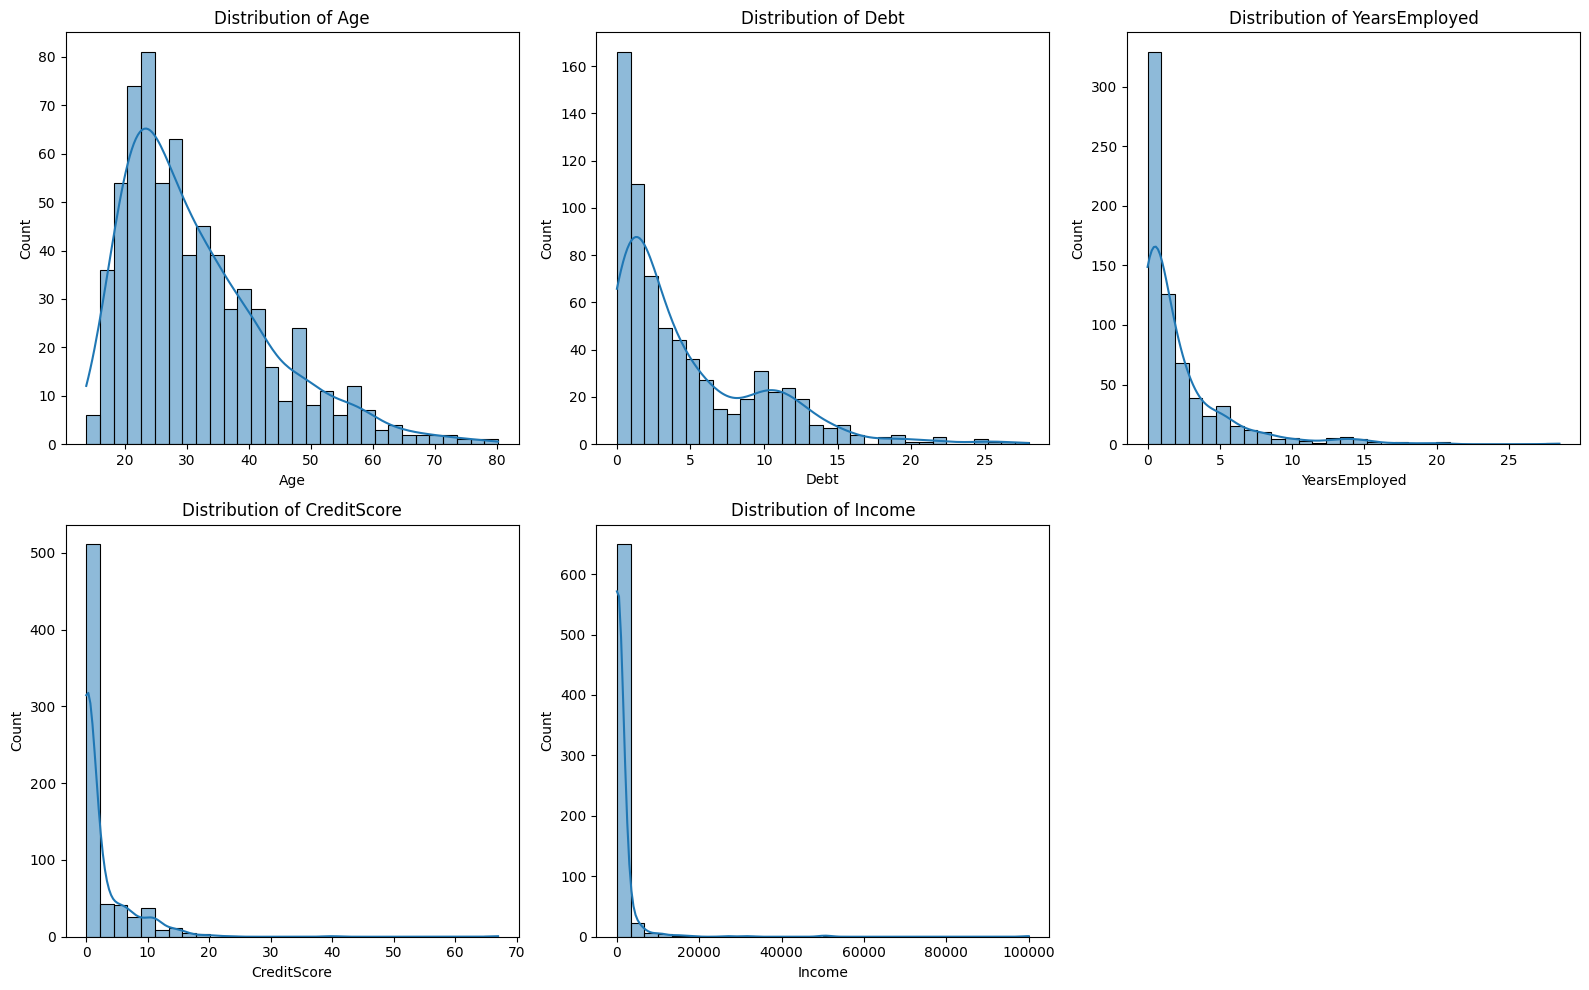

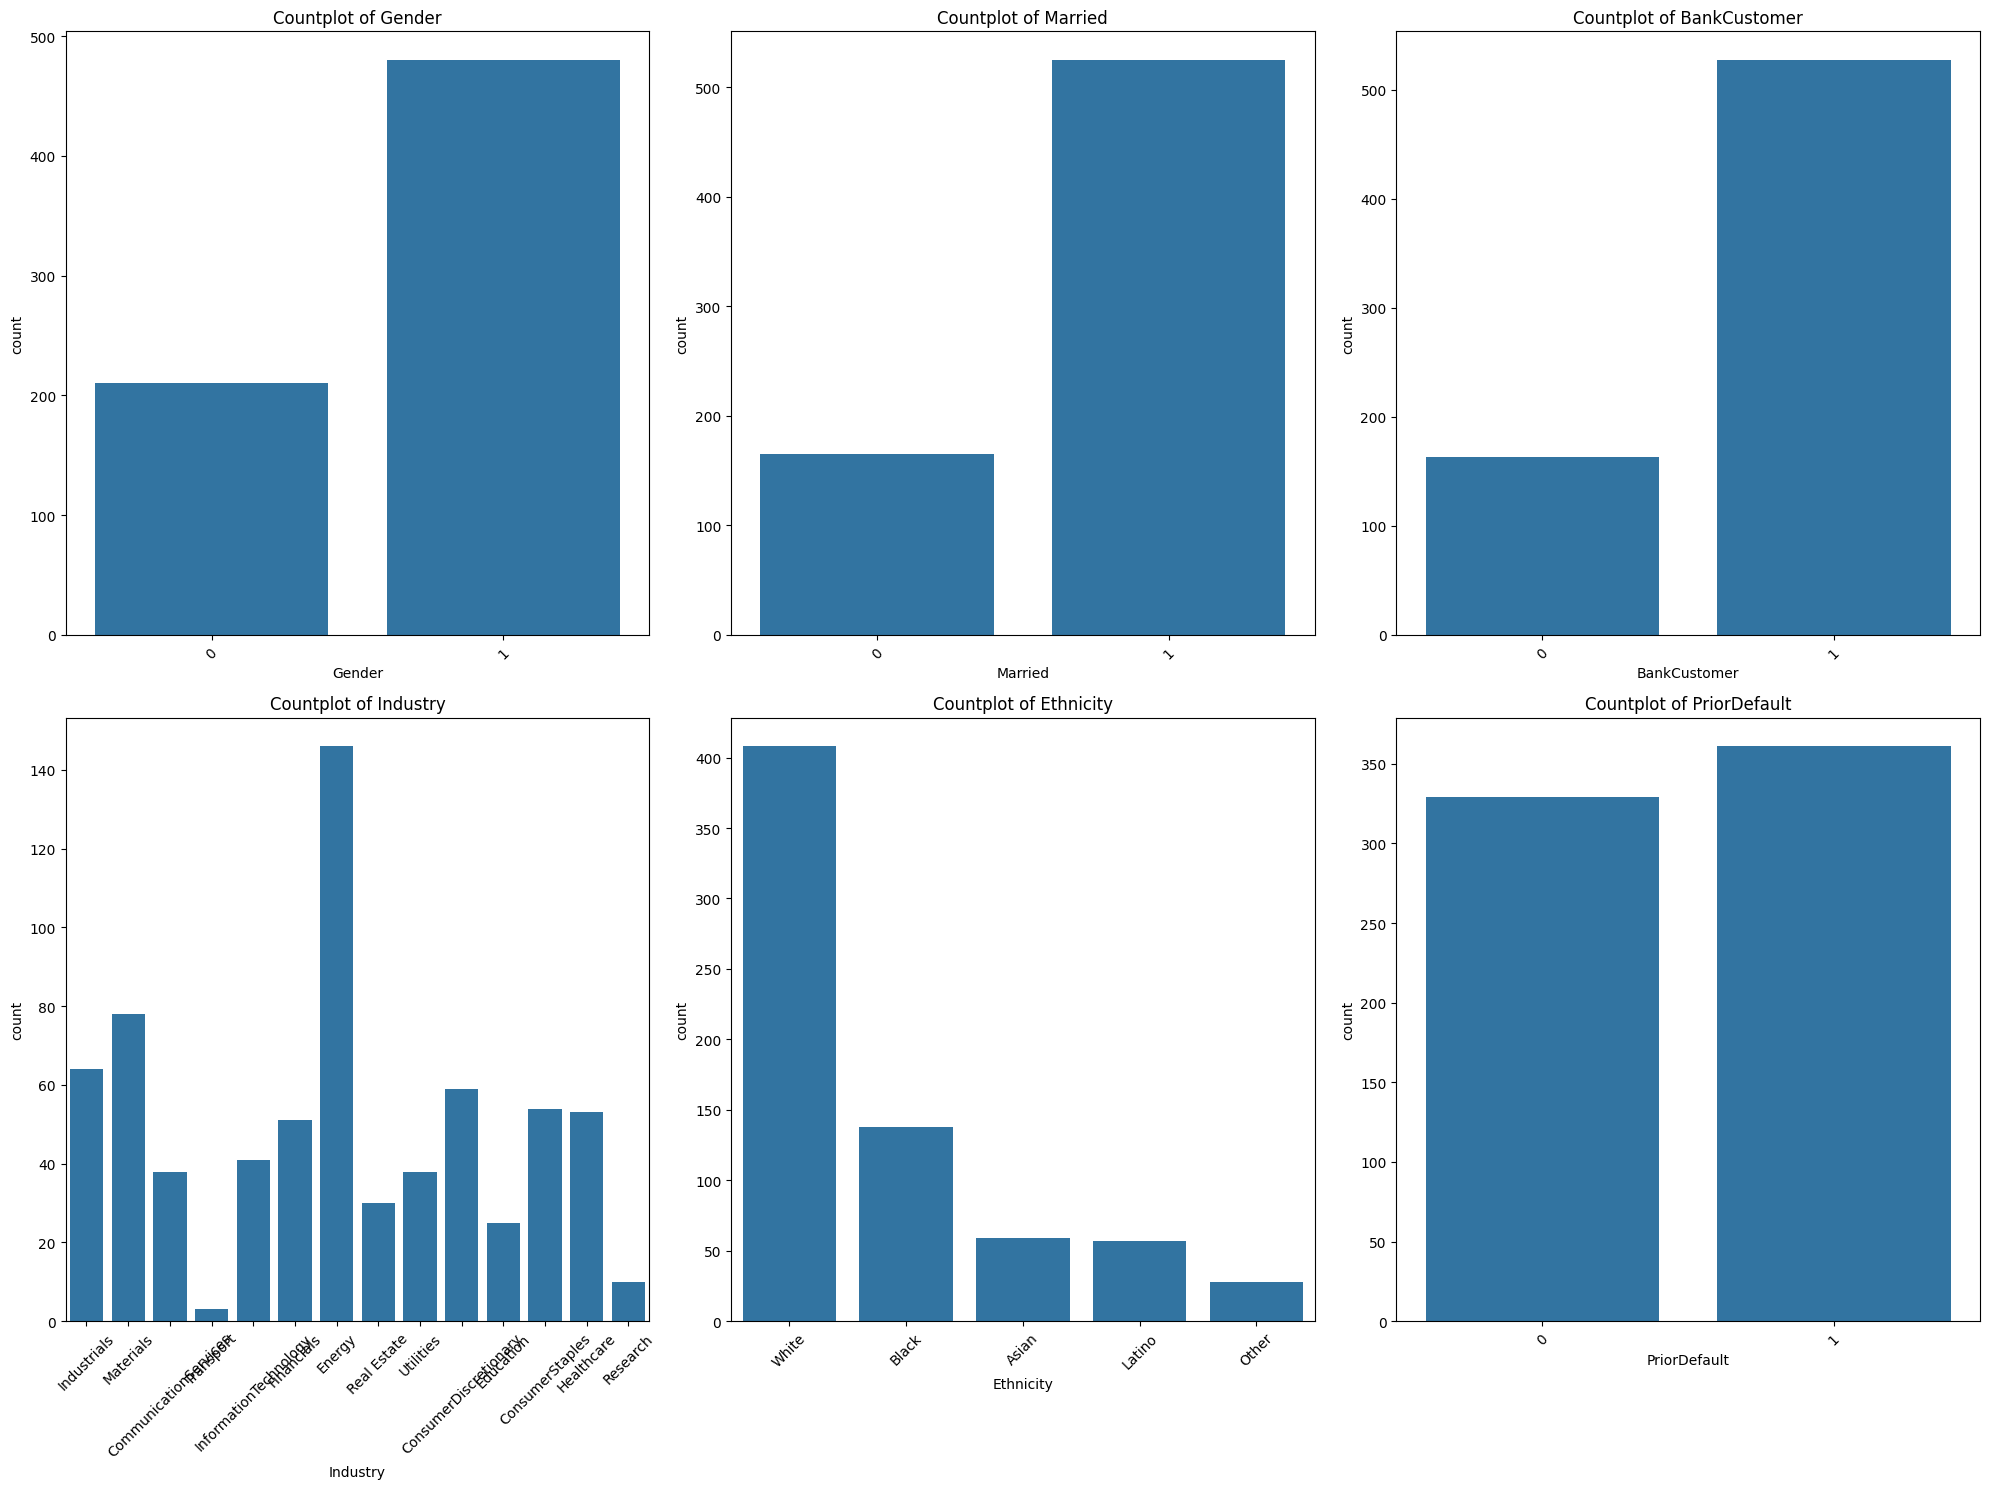

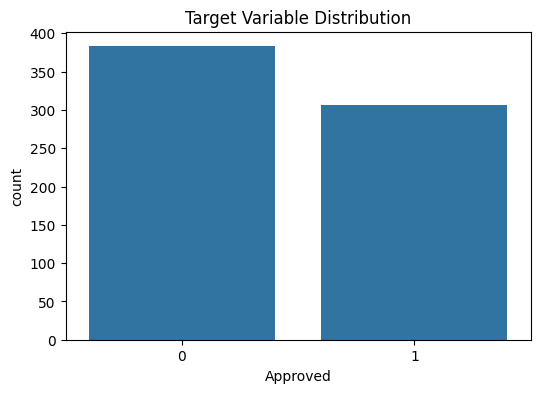

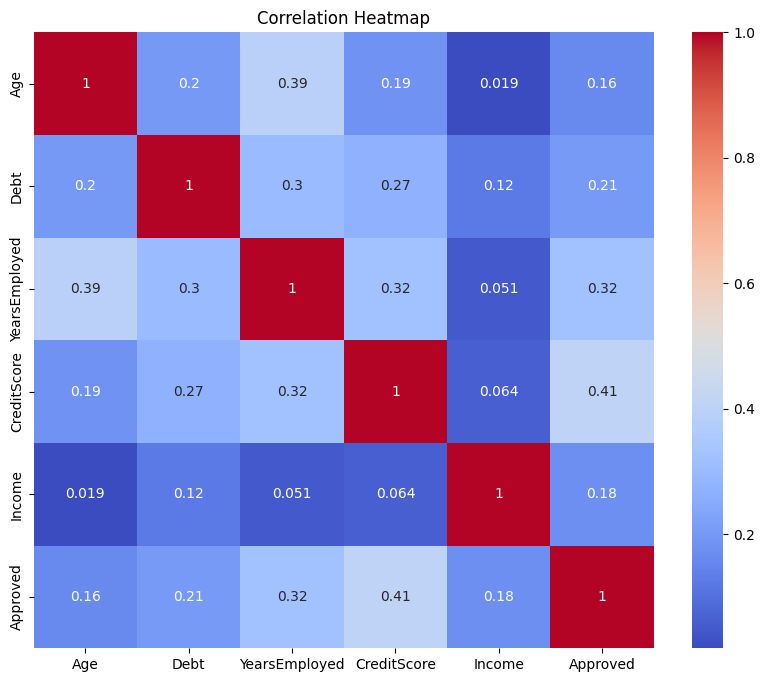

Best Parameters: {'classifier__C': 0.1}
Accuracy: 0.8188405797101449
Confusion Matrix:
 [[57 11]
 [14 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        68
           1       0.84      0.80      0.82        70

    accuracy                           0.82       138
   macro avg       0.82      0.82      0.82       138
weighted avg       0.82      0.82      0.82       138

Prediction for new data: Approved


In [7]:
# Task 2: Predicting Credit Card Approvals with Visualizations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Load Dataset
df = pd.read_csv('dataset/clean_dataset.csv')
df.columns = df.columns.str.strip()

# Print columns
print("Available Columns:", df.columns.tolist())

# Define feature lists
numeric_features = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']
categorical_features = ['Gender', 'Married', 'BankCustomer', 'Industry', 'Ethnicity',
                        'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'ZipCode']
required_columns = numeric_features + categorical_features + ['Approved']

# Validate columns
missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing columns in dataset: {missing_cols}")

# Step 2: Visualizations
plt.figure(figsize=(16, 10))

# 1. Distribution of numerical features
for i, col in enumerate(numeric_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 2. Countplots for categorical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_features[:6]):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

# 3. Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Approved')
plt.title('Target Variable Distribution')
plt.show()

# 4. Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_features + ['Approved']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 3: Preprocessing and Modeling
X = df.drop('Approved', axis=1)
y = df['Approved']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {'classifier__C': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 4: Predict on New Data
new_data = pd.DataFrame({
    'Gender': [1],
    'Age': [35.0],
    'Debt': [3.5],
    'Married': [1],
    'BankCustomer': [1],
    'Industry': ['Financials'],
    'Ethnicity': ['White'],
    'YearsEmployed': [2.5],
    'PriorDefault': [1],
    'Employed': [1],
    'CreditScore': [1],
    'DriversLicense': [1],
    'Citizen': ['ByBirth'],
    'ZipCode': ['00200'],
    'Income': [3000]
})
prediction = grid_search.predict(new_data)
print("Prediction for new data:", "Approved" if prediction[0] == 1 else "Not Approved")
